In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
root = '../input/'

In [5]:
cols = ['name', 'file_name','image_url', 'title', 'author', 'category_id', 'category']
train_meta_data = pd.read_csv('../input/book30-listing-train.csv', encoding='ISO-8859-1', names=cols)
test_meta_data = pd.read_csv('../input/book30-listing-test.csv', encoding='ISO-8859-1', names=cols)

In [6]:
train_meta_data.head()

,name,file_name,image_url,title,author,category_id,category
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa3rL.jpg,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3Tx6L.jpg,"Magnets: Pulling Together, Pushing Apart (Amazing Science)",Natalie M. Rosinsky,4,Children's Books
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhkyhL.jpg,Energy Security (SAGE Library of International Security),NaN,10,Engineering & Transportation
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi3ML.jpg,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb1CL.jpg,City of Rocks Idaho: A Climber's Guide (Regional Rock Climbing Series),Dave Bingham,26,Sports & Outdoors


In [7]:
classes = list(train_meta_data.category.unique())
print(classes)
print('No of Classes:', len(classes))

['Biographies & Memoirs', "Children's Books", 'Engineering & Transportation', 'Christian Books & Bibles', 'Sports & Outdoors', 'Health, Fitness & Dieting', 'Medical Books', 'Science & Math', 'Travel', 'Business & Money', 'Cookbooks, Food & Wine', 'Politics & Social Sciences', 'Crafts, Hobbies & Home', 'Religion & Spirituality', 'Literature & Fiction', 'Humor & Entertainment', 'Law', 'Computers & Technology', 'Test Preparation', 'Arts & Photography', 'Parenting & Relationships', 'Romance', 'History', 'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult', 'Self-Help', 'Calendars', 'Science Fiction & Fantasy', 'Mystery, Thriller & Suspense']
No of Classes: 30


In [8]:
sum_classes = train_meta_data.groupby(by='category').count().name.sum()
percent_classes = train_meta_data.groupby(by='category').count().name/sum_classes

In [9]:
percent_classes

category
Arts & Photography              0.033333
Biographies & Memoirs           0.033333
Business & Money                0.033333
Calendars                       0.033333
Children's Books                0.033333
Christian Books & Bibles        0.033333
Comics & Graphic Novels         0.033333
Computers & Technology          0.033333
Cookbooks, Food & Wine          0.033333
Crafts, Hobbies & Home          0.033333
Engineering & Transportation    0.033333
Health, Fitness & Dieting       0.033333
History                         0.033333
Humor & Entertainment           0.033333
Law                             0.033333
Literature & Fiction            0.033333
Medical Books                   0.033333
Mystery, Thriller & Suspense    0.033333
Parenting & Relationships       0.033333
Politics & Social Sciences      0.033333
Reference                       0.033333
Religion & Spirituality         0.033333
Romance                         0.033333
Science & Math                  0.033333
Science

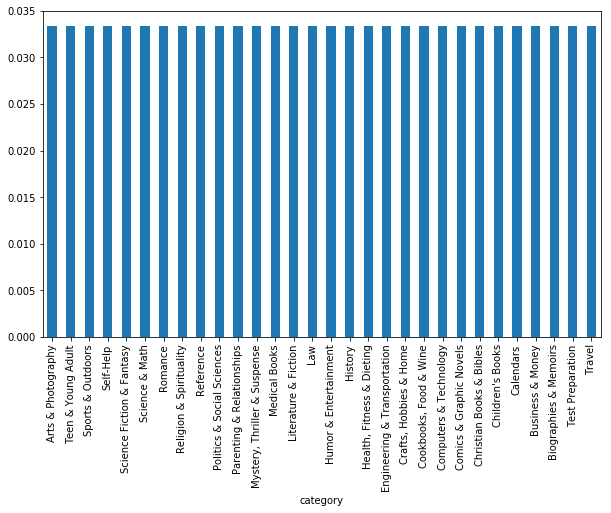

In [10]:
percent_classes.sort_values().plot(kind='bar', figsize=(10, 6))

In [11]:
train_meta_data[['file_name', 'title', 'author', 'category']].to_csv(root+'dataset_label/train_file.csv', index=False)
test_meta_data[['file_name', 'title', 'author', 'category']].to_csv(root+'dataset_label/test_file.csv', index=False)